In [33]:
#! python -m pip install --user opencv-contrib-python

In [109]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

In [110]:
def show_dataset (images_class, label) :
    # show doata for 1 class
    plt.figure(figsize = (14,5))
    k = 0
#     print(images_class)
    print(len(images_class))
    for i in range(1,len(images_class)):
        plt.subplot(1,len(images_class)-1,i)
        try :
            plt.imshow(images_class[k][:, :, ::-1])
        except :
            plt.imshow(images_class[k], cmap = 'gray')
        plt.title(label)
        plt.axis('off')
        plt.tight_layout()
        k += 1
    plt.show()

In [123]:
dataset_folder = "lib_small/"
# dataset_folder = "dataset/"

names = []
images = []
for folder in os.listdir(dataset_folder):
    for name in os.listdir(os.path.join(dataset_folder, folder))[:70]: #limit nb of faces per class to 70
        img = cv2.imread(os.path.join(dataset_folder + folder, name))
        images.append(img)
        names.append(folder)


In [124]:
labels = np.unique(names)
labels

array(['Albena', 'AlexandreF', 'Dorian', 'Erwan', 'Gauthier', 'Unknown'],
      dtype='<U10')

In [125]:
for label in labels:
    ids = np.where(label == np.array(names))[0]
    print(label, ids)
    images_class = images[ids[0] : ids[-1] + 1]
    #show_dataset(images_class, label)

Albena [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
AlexandreF [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Dorian [30 31 32 33 34 35 36 37 38 39 40 41 42]
Erwan [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57]
Gauthier [58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
Unknown [73 74 75 76 77 78 79 80 81 82 83 84]


In [126]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml') 

In [127]:
print(len(names))
print(len(images))
print(names)
# for i, img in enumerate(images) :
#     if(i == 84) :
#         plt.figure()
#         plt.imshow(img, cmap="gray")
#         plt.axis(False)
#         plt.show()

85
85
['Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown']


In [128]:
def detect_face(img, idx):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     if (idx > 120):
#         plt.figure()
#         plt.imshow(img, cmap="gray")
#         plt.axis(False)
#         plt.show()
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    try :
        x, y, w, h = faces[0]

        img = img[y:y+h, x:x+w]
        img = cv2.resize(img, (100, 100))
    except :
        print("Face not found in image index", i)
        img = None
    return img

In [6]:
def convert_and_trim_bb(image, rect):
    # extract the starting and ending (x, y)-coordinates of the
    # bounding box
    startX = rect.left()
    startY = rect.top()
    endX = rect.right()
    endY = rect.bottom()
    # ensure the bounding box coordinates fall within the spatial
    # dimensions of the image
    startX = max(0, startX)
    startY = max(0, startY)
    endX = min(endX, image.shape[1])
    endY = min(endY, image.shape[0])
    # compute the width and height of the bounding box
    w = endX - startX
    h = endY - startY
    # return our bounding box coordinates
    return (startX, startY, w, h)

In [7]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor("tuto/shape_predictor_68_face_landmarks.dat")
# https://github.com/davisking/dlib/tree/master/python_examples

def detect_face(img, idx):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    detections = detector(img, 1)

    # Find landmarks
    faces = dlib.full_object_detections()
    for det in detections:
        faces.append(sp(img, det))
        
    bb_ = [i.rect for i in faces] #rect_to_bb(faces[0].rect)
    bb = [((i.left(), i.top())  ,(i.right(), i.bottom())) for i in bb_]        # Convert out of dlib format


    startX, startY, w, h = convert_and_trim_bb(img, faces[0].rect)

    img = img[startY:startY+h, startX:startX+w]
    img = cv2.resize(img, (100, 100))
#     for i in bb:
#         img = cv2.rectangle(img, i[0], i[1], (255, 255, 255), 5)  #i = [(1149, 1469), (2108, 2428)]

#         img = img[i[0][0]:i[1][1],i[0][1]:i[1][0]]
        
        
    return img

In [129]:
croped_images = []
to_be_removed = []
for i, img in  reversed(list(enumerate(images))) :
    img = detect_face(img, i)
    print(str(i) + "/" + str(len(images)))
    if img is not None :
        croped_images.append(img)
    else :
        del names[i]
#         to_be_removed.append(i)

Face not found in image index 84
84/85
83/85
82/85
81/85
80/85
79/85
78/85
77/85
76/85
75/85
74/85
73/85
72/85
71/85
70/85
69/85
68/85
67/85
66/85
65/85
64/85
63/85
62/85
61/85
60/85
59/85
58/85
57/85
56/85
55/85
54/85
53/85
52/85
51/85
50/85
49/85
48/85
47/85
46/85
45/85
44/85
43/85
42/85
41/85
40/85
39/85
38/85
37/85
36/85
35/85
34/85
33/85
32/85
31/85
30/85
29/85
28/85
27/85
26/85
25/85
24/85
23/85
22/85
21/85
20/85
19/85
18/85
17/85
16/85
15/85
14/85
13/85
12/85
11/85
10/85
9/85
8/85
7/85
6/85
5/85
4/85
3/85
2/85
1/85
0/85


In [130]:
croped_images.reverse()

In [131]:
def save_crop_dataset (images_class, label) :
    k = 0
    for i in range(1,len(images_class)):
        try :
            os.mkdir("croppedData/" + label)
            cv2.imwrite("croppedData/" + label +"/" + label + str(i) + ".jpg", images_class[k])
        except :
            cv2.imwrite("croppedData/" + label +"/" + label + str(i) + ".jpg", images_class[k])
        k += 1

15 Albena
15


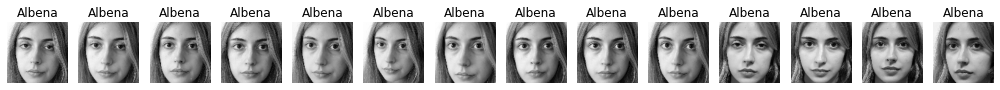

15 AlexandreF
15


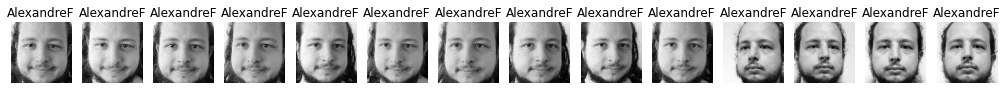

13 Dorian
13


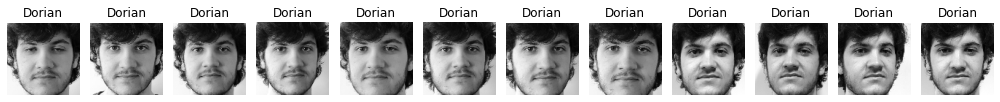

15 Erwan
15


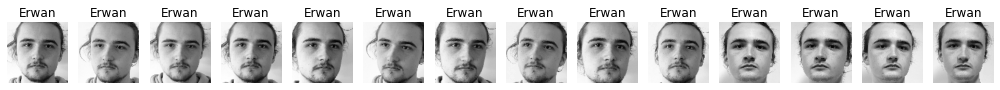

15 Gauthier
15


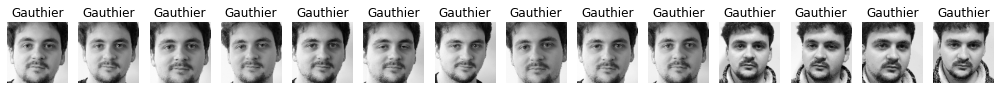

11 Unknown
11


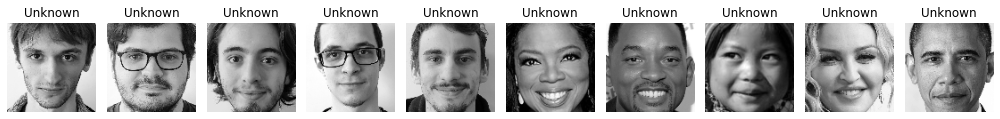

In [132]:
for label in labels:  
    ids = np.where(label== np.array(names))[0]
    images_class = croped_images[ids[0] : ids[-1] + 1] # select croped images for each class
    print(len(images_class), label)
    show_dataset(images_class, label)
    save_crop_dataset (images_class, label)

In [121]:
cropped_dataset_folder = "croppedDataTest/"

croped_images = []
names = []
imgs = 0
for folder in os.listdir(cropped_dataset_folder):
    nb_img_per_name = 0
    for name in os.listdir(os.path.join(cropped_dataset_folder, folder)):
        img = cv2.imread(os.path.join(cropped_dataset_folder + folder, name))
        croped_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        names.append(folder)
        nb_img_per_name+=1
    show_dataset(croped_images[imgs : imgs + nb_img_per_name], names[-1])
    print('images', imgs , nb_img_per_name)
    imgs+=nb_img_per_name

In [122]:
labels = np.unique(names)
labels
for label in labels:
    ids = np.where(label == np.array(names))[0]
    print(label, ids)
    images_class = croped_images[ids[0] : ids[-1] + 1]
    #show_dataset(images_class, label)

In [133]:
len(names)
name_vec = np.array([np.where(name == labels)[0][0] for name in names])
print(len(name_vec))
print(len(labels))

84
6


In [134]:
#model = cv2.face.EigenFaceRecognizer_create()
#model = cv2.face.FisherFaceRecognizer_create()
model = cv2.face.LBPHFaceRecognizer_create()

In [135]:
model.train(croped_images, name_vec)

In [136]:
#save & load model
model.save("eigen_model.yml")
model.read("eigen_model.yml")

In [84]:
# Test real time video 
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv2.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img


In [64]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor("tuto/shape_predictor_68_face_landmarks.dat")

# def detect_face(img, idx):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     detections = detector(img, 1)

#     # Find landmarks
#     faces = dlib.full_object_detections()
#     for det in detections:
#         faces.append(sp(img, det))
        
#     bb_ = [i.rect for i in faces] #rect_to_bb(faces[0].rect)
#     bb = [((i.left(), i.top())  ,(i.right(), i.bottom())) for i in bb_]        # Convert out of dlib format


#     startX, startY, w, h = convert_and_trim_bb(img, faces[0].rect)

#     img = img[startY:startY+h, startX:startX+w]
#     img = cv2.resize(img, (100, 100))
    
cap = cv2.VideoCapture(1)
cap.set(3,320)
cap.set(4,180)
cv2.namedWindow("Detect face", cv2.WND_PROP_FULLSCREEN)
cv2.setWindowProperty("Detect face",cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)
while cap.isOpened() :
    ret, img = cap.read()
    if ret:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        detector = dlib.get_frontal_face_detector()
        detections = detector(gray, 1)

        # Find landmarks
        sp = dlib.shape_predictor("tuto/shape_predictor_68_face_landmarks.dat")
        faces = dlib.full_object_detections()
        for det in detections:
            faces.append(sp(gray, det))
            
        bb = [i.rect for i in faces]
        bb = [((i.left(), i.top()),
               (i.right(), i.bottom())) for i in bb]                            # Convert out of dlib format

        right_eyes = [[face.part(i) for i in range(36, 42)] for face in faces]
        right_eyes = [[(i.x, i.y) for i in eye] for eye in right_eyes]          # Convert out of dlib format

        left_eyes = [[face.part(i) for i in range(42, 48)] for face in faces]
        left_eyes = [[(i.x, i.y) for i in eye] for eye in left_eyes]            # Convert out of dlib format
        imgd = img
        
        for i in bb:
            cv2.rectangle(imgd, i[0], i[1], (255, 0, 0), 5)     # Bounding box
            
            startX, startY, w, h = convert_and_trim_bb(gray, faces[0].rect)

            face_img = gray[startY:startY+h, startX:startX+w]
            face_img = cv2.resize(face_img, (100, 100))
            idx, confidence = model.predict(face_img)
            
            label_text = "%s" % (labels[idx])
            
            imgd = draw_ped(imgd, label_text, startX, startY, startX + w, startY + h, color=(0,255,255), text_color=(50,50,50))
            if (label_text == 'Unknown'):
                imgd = draw_ped(imgd, label_text, startX, startY, startX + w, startY + h, color=(0,0,255), text_color=(0,0,0))

#         for (x, y, w, h) in faces:
            
#             face_img = gray[y:y+h, x:x+w]
#             face_img = cv2.resize(face_img, (100, 100))
                
#             idx, confidence = model.predict(face_img)
#             #label_text = "%s (%.2f %%)" % (labels[idx], confidence)
#             label_text = "%s" % (labels[idx])
#             frame = draw_ped(frame, label_text, x, y, x + w, y + h, color=(0,255,255), text_color=(50,50,50))
#             if (label_text == 'Unknown'):
#                 frame = draw_ped(frame, label_text, x, y, x + w, y + h, color=(0,0,255), text_color=(0,0,0))
            
       
        cv2.imshow("Detect face", imgd)
    else :
        break
    if cv2.waitKey(10) == ord('q'):
        break
cv2.waitKey(0)        
cv2.destroyAllWindows()
cap.release()

In [69]:
import dlib
import cv2

# Load image
img = cv2.imread("Albena4.jpg")

# Convert to dlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
detector = dlib.get_frontal_face_detector()
detections = detector(img, 1)

# Find landmarks
sp = dlib.shape_predictor("tuto/shape_predictor_68_face_landmarks.dat")
faces = dlib.full_object_detections()
for det in detections:
    faces.append(sp(gray, det))

bb = [i.rect for i in faces]
bb = [((i.left(), i.top()),
       (i.right(), i.bottom())) for i in bb]                            # Convert out of dlib format

right_eyes = [[face.part(i) for i in range(36, 42)] for face in faces]
right_eyes = [[(i.x, i.y) for i in eye] for eye in right_eyes]          # Convert out of dlib format

left_eyes = [[face.part(i) for i in range(42, 48)] for face in faces]
left_eyes = [[(i.x, i.y) for i in eye] for eye in left_eyes]            # Convert out of dlib format
imgd = img

for i in bb:
    cv2.rectangle(imgd, i[0], i[1], (255, 0, 0), 5)     # Bounding box

    startX, startY, w, h = convert_and_trim_bb(img, faces[0].rect)

    face_img = img[startY:startY+h, startX:startX+w]
    face_img = cv2.resize(face_img, (100, 100))
    idx, confidence = model.predict(face_img)

    label_text = "%s" % (labels[idx])

    imgd = draw_ped(imgd, label_text, startX, startY, startX + w, startY + h, color=(0,255,255), text_color=(50,50,50))
    if (label_text == 'Unknown'):
        imgd = draw_ped(imgd, label_text, startX, startY, startX + w, startY + h, color=(0,0,255), text_color=(0,0,0))

cv2.imwrite(label + ".jpg", imgd)

cv2.imshow("output", imgd)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
def detect_face(img, idx):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    detector = dlib.get_frontal_face_detector()
    detections = detector(img, 1)
    #faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    sp = dlib.shape_predictor("tuto/shape_predictor_68_face_landmarks.dat")
    faces = dlib.full_object_detections()
    for det in detections:
        faces.append(sp(img, det))
        
    # Bounding box and eyes
    bb = [i.rect for i in faces]
    bb = [((i.left(), i.top()),
           (i.right(), i.bottom())) for i in bb]                            # Convert out of dlib format

    right_eyes = [[face.part(i) for i in range(36, 42)] for face in faces]
    right_eyes = [[(i.x, i.y) for i in eye] for eye in right_eyes]          # Convert out of dlib format

    left_eyes = [[face.part(i) for i in range(42, 48)] for face in faces]
    left_eyes = [[(i.x, i.y) for i in eye] for eye in left_eyes]            # Convert out of dlib format

    if
    try :
        x, y, w, h = faces[0]

        img = img[y:y+h, x:x+w]
        img = cv2.resize(img, (100, 100))
    except :
        print("Face not found in image index", i)
        img = None
    return img

SyntaxError: invalid syntax (Temp/ipykernel_18428/779781248.py, line 24)

In [85]:
from sklearn.metrics import confusion_matrix

In [137]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Actual 	:  Albena (1).jpg
Predic 	:  Albena
Confidence 	:  0.0


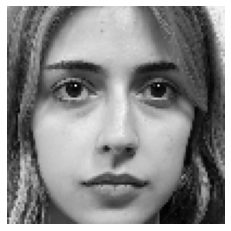

Actual 	:  Albena (2).jpg
Predic 	:  Albena
Confidence 	:  75.41144803263279


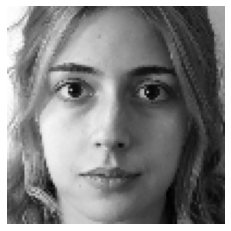

Actual 	:  Albena (3).jpg
Predic 	:  Albena
Confidence 	:  0.0


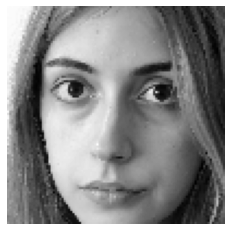

Actual 	:  Albena (4).jpg
Predic 	:  Albena
Confidence 	:  86.7688579382954


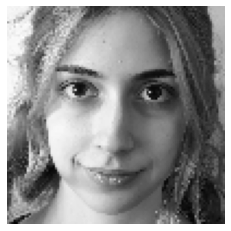

Actual 	:  Albena (5).jpg
Predic 	:  Albena
Confidence 	:  81.05465404981472


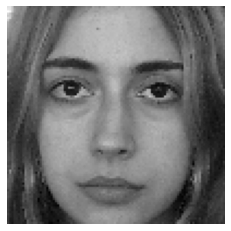

Actual 	:  AlexandreF (1).jpg
Predic 	:  AlexandreF
Confidence 	:  0.0


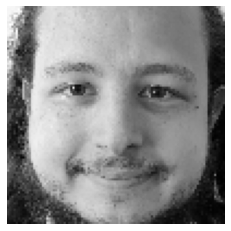

Actual 	:  AlexandreF (2).jpg
Predic 	:  AlexandreF
Confidence 	:  87.94189249535961


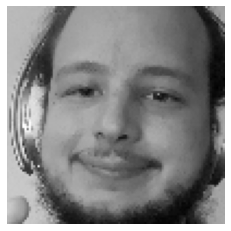

Actual 	:  AlexandreF (3).jpg
Predic 	:  AlexandreF
Confidence 	:  0.0


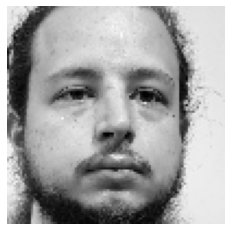

Actual 	:  AlexandreF (4).jpg
Predic 	:  AlexandreF
Confidence 	:  94.33720173503346


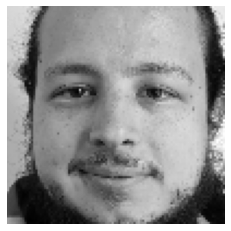

Actual 	:  AlexandreF (5).jpg
Predic 	:  AlexandreF
Confidence 	:  93.92344650274026


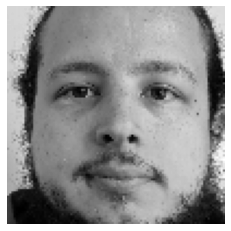

Actual 	:  Dorian (1).jpg
Predic 	:  Dorian
Confidence 	:  90.82535994230884


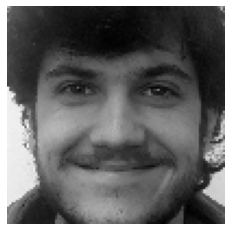

Actual 	:  Dorian (2).jpg
Predic 	:  Dorian
Confidence 	:  0.0


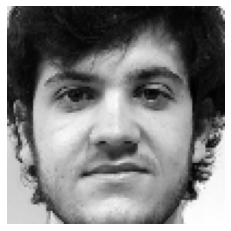

Actual 	:  Dorian (3).jpg
Predic 	:  Dorian
Confidence 	:  0.0


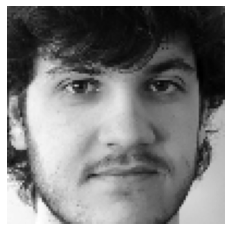

Actual 	:  Dorian (4).jpg
Predic 	:  Dorian
Confidence 	:  0.0


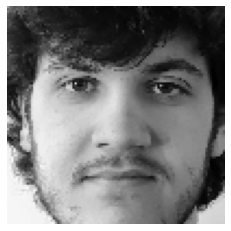

Actual 	:  Erwan (1).jpg
Predic 	:  Erwan
Confidence 	:  86.9190408106777


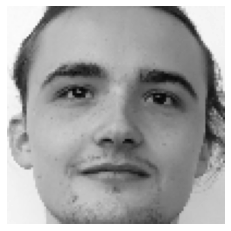

Actual 	:  Erwan (2).jpg
Predic 	:  Erwan
Confidence 	:  81.3864906591208


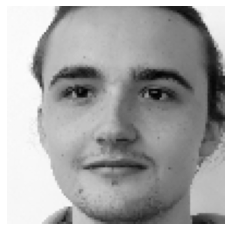

Actual 	:  Erwan (3).jpg
Predic 	:  Erwan
Confidence 	:  0.0


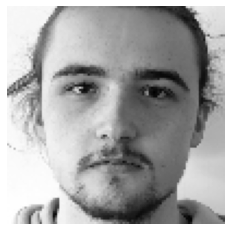

Actual 	:  Erwan (4).jpg
Predic 	:  Erwan
Confidence 	:  0.0


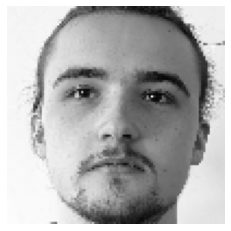

Actual 	:  Erwan (5).jpg
Predic 	:  Erwan
Confidence 	:  0.0


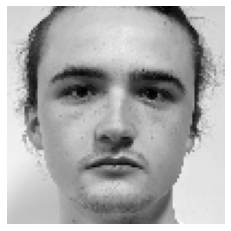

Actual 	:  Gauthier (1).jpg
Predic 	:  Gauthier
Confidence 	:  68.581651804251


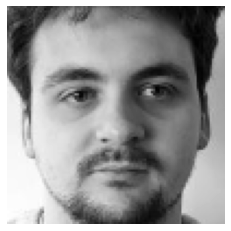

Actual 	:  Gauthier (2).jpg
Predic 	:  Gauthier
Confidence 	:  0.0


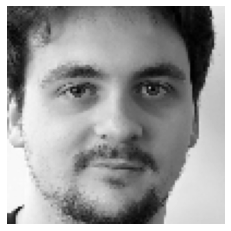

Actual 	:  Gauthier (3).jpg
Predic 	:  Gauthier
Confidence 	:  69.73399941489713


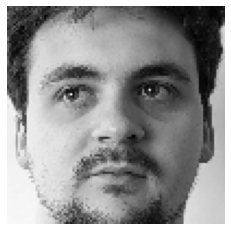

Actual 	:  Gauthier (4).jpg
Predic 	:  Gauthier
Confidence 	:  68.64648190055905


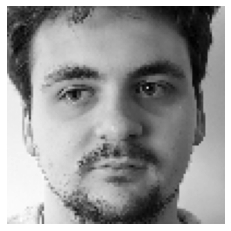

Actual 	:  Gauthier (5).jpg
Predic 	:  Gauthier
Confidence 	:  0.0


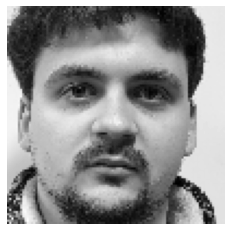

Actual 	:  Unknown (1).jpg
Predic 	:  Unknown
Confidence 	:  93.07710032903985


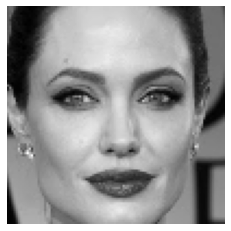

Actual 	:  Unknown (2).jpg
Predic 	:  Unknown
Confidence 	:  96.05730775632448


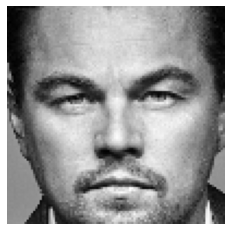

In [139]:
test_folder = "lib_test_small/"
actual_names = []
predicted_names = []
confidences = []
for filename in os.listdir(test_folder):
    if filename.find(".jpg") > -1:
        path = os.path.join(test_folder, filename)
        
        img = cv2.imread(path)
        img = detect_face(img, 0)

        idx, confidence = model.predict(img)
        
        actual_names.append(np.where(filename[:-8] == labels)[0][0]) #get label from filename (remove 9 last char)
        predicted_names.append(idx)
        confidences.append(confidence)
        
        print("Actual \t: ", filename)
        print("Predic \t: ", labels[idx])
        print("Confidence \t: ", confidence)

        plt.figure()
        plt.imshow(img, cmap="gray")
        plt.axis(False)
        plt.show()

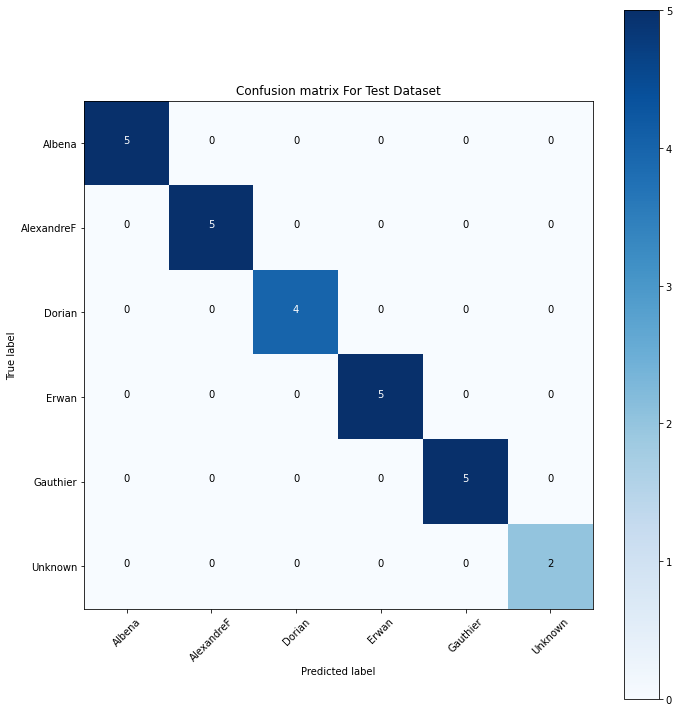

In [140]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual_names, predicted_names)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix For Test Dataset')

In [141]:
from sklearn.metrics import classification_report


In [142]:
print("== Classification Report for Test Dataset ==\n")
print(classification_report(actual_names, 
                            predicted_names, 
                            target_names=labels))

== Classification Report for Test Dataset ==

              precision    recall  f1-score   support

      Albena       1.00      1.00      1.00         5
  AlexandreF       1.00      1.00      1.00         5
      Dorian       1.00      1.00      1.00         4
       Erwan       1.00      1.00      1.00         5
    Gauthier       1.00      1.00      1.00         5
     Unknown       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

